## 1. Necessary Imports, Fetch Dataset


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import seaborn as sns

In [ ]:
#using only male and female player csv from the dataset, not using coaches,teams,etc as not relevant to our project 

df1= pd.read_csv("male_players.csv")
df2= pd.read_csv("female_players.csv")

In [4]:
df1.columns 

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [5]:
df2.columns 

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [6]:
df = pd.concat([df1, df2], ignore_index=True)


## 2. Preprocessing of Dataset

In [7]:
#feature_columns is the list of attributes that we have found useful from the given dataset for our problem statement.


feature_columns = [
  "player_id", 
  "short_name", 
  "height_cm", 
  "weight_kg",
  "potential",
  "value_eur",
  "player_positions",
  "preferred_foot",
  "weak_foot",
  "club_position",
  "nation_position",
  "pace",
  "shooting",
  "passing",
  "dribbling",
  "defending",
  "physic", 
  "goalkeeping_diving",
  "goalkeeping_handling",
  "goalkeeping_kicking",
  "goalkeeping_reflexes", 
  "goalkeeping_speed", 
  "goalkeeping_positioning", 
  "attacking_crossing", 
  "attacking_finishing", 
  "attacking_heading_accuracy", 
  "attacking_short_passing", 
  "attacking_volleys",
  "skill_dribbling",
  "skill_curve",
  "skill_fk_accuracy",
  "skill_long_passing",
  "skill_ball_control",
  "movement_acceleration",
  "movement_sprint_speed",
  "movement_agility",
  "movement_reactions",
  "movement_balance",
  "power_shot_power",
  "power_jumping",
  "power_stamina",
  "power_strength",
  "power_long_shots",
  "mentality_aggression",
  "mentality_interceptions",
  "mentality_positioning",
  "mentality_vision",
  "mentality_penalties",
  "mentality_composure",
  "defending_standing_tackle",
  "defending_sliding_tackle",
  "goalkeeping_diving",
  "goalkeeping_handling",
  "goalkeeping_kicking",
  "goalkeeping_positioning",
  "goalkeeping_reflexes"
]

In [8]:
# Mapping grid positions for association football (soccer) to a simplified set of 10 positions.
# This mapping is based on standard positional abbreviations.

# map_grid_positions maps specific player positions to generalized grid positions
map_grid_positions = {
    'GK': 'GK',  # Goalkeeper

    'LB': 'LB',  # Left Back
    'LWB': 'LB',  # Left Wing Back
    'LDM': 'LB',  # Left Defensive Midfielder
    'LCB': 'LB',  # Left Center Back

    'SW': 'CB',  # Sweeper
    'CB': 'CB',  # Center Back
    'CDM': 'CB',  # Central Defensive Midfielder
    
    'RB': 'RB',  # Right Back
    'RWB': 'RB',  # Right Wing Back
    'RDM': 'RB',  # Right Defensive Midfielder
    'RCB': 'RB',  # Right Center Back

    'LM': 'LM',  # Left Midfielder
    'LCM': 'LM',  # Left Center Midfielder
    'LAM': 'LM',  # Left Attacking Midfielder

    'CM': 'CM',  # Central Midfielder
    'CAM': 'CM',  # Central Attacking Midfielder

    'RM': 'RM',  # Right Midfielder
    'RCM': 'RM',  # Right Center Midfielder
    'RAM': 'RM',  # Right Attacking Midfielder

    'LW': 'LF',  # Left Winger
    'LS': 'LF',  # Left Striker
    'LF': 'LF',  # Left Forward

    'CF': 'CF',  # Center Forward
    'ST': 'CF',  # Striker

    'RW': 'RF',  # Right Winger
    'RS': 'RF',  # Right Striker
    'RF': 'RF'   # Right Forward
}

# map_vertical_positions maps player positions to their vertical grid placement (Back, Midfield, Forward)
map_vertical_positions = {
    'GK': 'GK',  # Goalkeeper
    'LB': 'B',   # Left Back
    'CB': 'B',   # Center Back
    'RB': 'B',   # Right Back

    'LM': 'M',   # Left Midfielder
    'CM': 'M',   # Central Midfielder
    'RM': 'M',   # Right Midfielder

    'LF': 'F',   # Left Forward
    'CF': 'F',   # Center Forward
    'RF': 'F'    # Right Forward
}

# map_horizontal_positions maps player positions to their horizontal grid placement (Left, Center, Right)
map_horizontal_positions = {
    'GK': 'GK',  # Goalkeeper
    'LB': 'L',   # Left Back
    'LM': 'L',   # Left Midfielder
    'LF': 'L',   # Left Forward

    'CB': 'C',   # Center Back
    'CM': 'C',   # Central Midfielder
    'CF': 'C',   # Center Forward

    'RB': 'R',   # Right Back
    'RM': 'R',   # Right Midfielder
    'RF': 'R'    # Right Forward
}


In [9]:
def get_df(feature_columns,df):
  
  df = df[feature_columns]
  return df

In [10]:
df= get_df(feature_columns, df)

In [11]:
def choose_first_position(data):
  if data.find(",") != -1:
    data=data[:data.find(",")]
  return data.strip()

In [12]:
# The preprocess function processes a DataFrame by mapping player positions, calculating cumulative statistics for various
# skill categories, and dropping unnecessary columns to prepare the data for analysis or modeling.

def preprocess(df):
  df['player_positions'] = df['player_positions'].apply(choose_first_position)
  df['player_positions'] = df['player_positions'].apply(lambda x: map_grid_positions[x])
  df['vertical_position'] = df['player_positions'].apply(lambda x: map_vertical_positions[x])
  df['horizontal_position'] = df['player_positions'].apply(lambda x: map_horizontal_positions[x])

  df = df.drop(
    labels = [
      'short_name', 
      'value_eur', 
      'weak_foot', 
      'club_position', 
      'nation_position',
      'player_id', 
      ], 
      axis = 1)
  df = df.fillna(value = 0, axis = 1)
  print(len(df.columns))
  df['gk_cumulative'] = df[[  
    "goalkeeping_diving",
    "goalkeeping_handling",
    "goalkeeping_kicking",
    "goalkeeping_reflexes", 
    "goalkeeping_speed", 
    "goalkeeping_positioning"
  ]].mean(axis = 1)

  df['attacking_cumulative'] = df[[
    "attacking_crossing", 
    "attacking_finishing", 
    "attacking_heading_accuracy", 
    "attacking_short_passing", 
    "attacking_volleys"
  ]].mean(axis = 1)

  df['skill_cumulative'] = df[[
    "skill_dribbling",
    "skill_curve",
    "skill_fk_accuracy",
    "skill_long_passing",
    "skill_ball_control"
  ]].mean(axis = 1)

  df['movement_cumulative'] = df[[
    "movement_acceleration",
    "movement_sprint_speed",
    "movement_agility",
    "movement_reactions",
    "movement_balance"
  ]].mean(axis = 1)

  df['power_cumulative'] = df[[
    "power_shot_power",
    "power_jumping",
    "power_stamina",
    "power_strength",
    "power_long_shots"
  ]].mean(axis = 1)

  df['mentality_cumulative'] = df[[
    "mentality_aggression",
    "mentality_interceptions",
    "mentality_positioning",
    "mentality_vision",
    "mentality_penalties",
    "mentality_composure"
  ]].mean(axis = 1)

  df['mentality_cumulative'] = df[[
    "mentality_aggression",
    "mentality_interceptions",
    "mentality_positioning",
    "mentality_vision",
    "mentality_penalties",
    "mentality_composure"
  ]].mean(axis = 1)

  df['goalkeeping_cumulative'] = df[[
    "goalkeeping_diving",
    "goalkeeping_handling",
    "goalkeeping_kicking",
    "goalkeeping_positioning",
    "goalkeeping_reflexes"                        
  ]].mean(axis = 1)

  df = df.drop(
    labels = [
      "goalkeeping_diving",
      "goalkeeping_handling",
      "goalkeeping_kicking",
      "goalkeeping_reflexes", 
      "goalkeeping_speed", 
      "goalkeeping_positioning", 
      "attacking_crossing", 
      "attacking_finishing", 
      "attacking_heading_accuracy", 
      "attacking_short_passing", 
      "attacking_volleys",
      "skill_dribbling",
      "skill_curve",
      "skill_fk_accuracy",
      "skill_long_passing",
      "skill_ball_control",
      "movement_acceleration",
      "movement_sprint_speed",
      "movement_agility",
      "movement_reactions",
      "movement_balance",
      "power_shot_power",
      "power_jumping",
      "power_stamina",
      "power_strength",
      "power_long_shots",
      "mentality_aggression",
      "mentality_interceptions",
      "mentality_positioning",
      "mentality_vision",
      "mentality_penalties",
      "mentality_composure",
      "defending_standing_tackle",
      "defending_sliding_tackle",
      "goalkeeping_diving",
      "goalkeeping_handling",
      "goalkeeping_kicking",
      "goalkeeping_positioning",
      "goalkeeping_reflexes"
      ], 
      axis = 1)

  return df

In [13]:
df = preprocess(df)

52


In [14]:
df.head()

height_cm weight_kg potential player_positions preferred_foot  pace  \
0       169        67        91               RF           Left  81.0   
1       185        81        91               CF          Right  80.0   
2       185        81        91               CF          Right  75.0   
3       181        75        91               CM          Right  74.0   
4       182        73        95               CF          Right  97.0   

  shooting passing dribbling defending physic vertical_position  \
0     89.0    90.0      94.0      34.0   64.0                 F   
1     88.0    83.0      87.0      39.0   78.0                 F   
2     91.0    79.0      86.0      44.0   83.0                 F   
3     88.0    93.0      87.0      63.0   77.0                 M   
4     89.0    80.0      92.0      36.0   76.0                 F   

  horizontal_position gk_cumulative attacking_cumulative skill_cumulative  \
0                   R      9.818182                 84.6             92.8   
1                   C      7.454545                 86.8             81.8   
2                   C      9.272727                 85.8             81.6   
3                   C     10.181818                 82.0             88.4   
4                   C      7.636364                 82.2             80.8   

  movement_cumulative power_cumulative mentality_cumulative  \
0                88.2             76.6            73.666667   
1                80.2             82.0            76.166667   
2                80.6             84.6                 80.5   
3                78.8             81.8            82.166667   
4                92.2             82.0            74.166667   

  goalkeeping_cumulative  
0                   10.8  
1                    8.2  
2                   10.2  
3                   11.2  
4                    8.4

## 3. EDA

[1143681, 791980, 2553729, 796118, 574110, 1799341, 583609, 203587, 1524877, 213919]


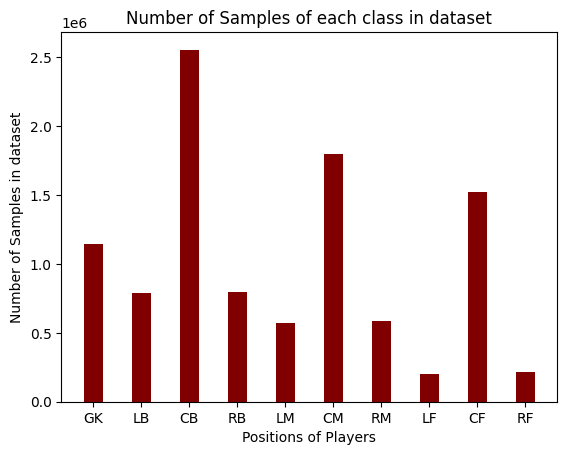

In [15]:
# Function to print number of samples for each class
pos_label = [
    'GK',
    'LB',
    'CB',
    'RB',
    'LM',
    'CM',
    'RM',
    'LF',
    'CF',
    'RF'             
  ]
def plot_data_balance(df):
  positions = [
    'GK',
    'LB',
    'CB',
    'RB',
    'LM',
    'CM',
    'RM',
    'LF',
    'CF',
    'RF'             
  ]
  num_samples = []
  for position in positions:
    num_samples.append(len(df[df['player_positions'] == position]))
    
  print(num_samples)
  plt.bar(positions, num_samples, color ='maroon', width = 0.4)
 
  plt.xlabel("Positions of Players")
  plt.ylabel("Number of Samples in dataset")
  plt.title("Number of Samples of each class in dataset")
  plt.show()


plot_data_balance(df)

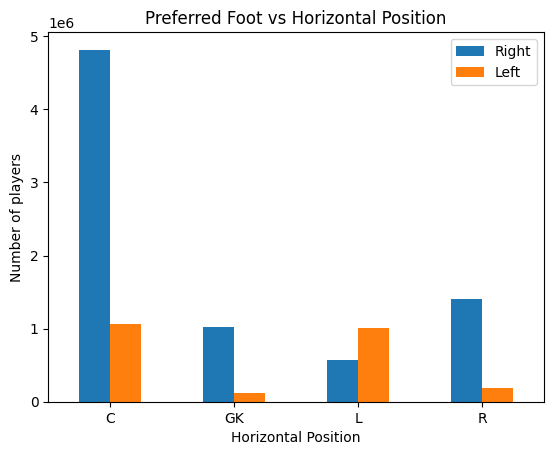

In [16]:
# Preferred Foot vs Horizontal Classes
def plot_preferred_foot(df):
  temp_df=df.groupby(['horizontal_position'])['preferred_foot'].value_counts()
  right_df=temp_df.loc[:,'Right']
  left_df=temp_df.loc[:,'Left']

  mydf = pd.DataFrame({"Right":right_df,"Left":left_df})
  ax = mydf.plot.bar(rot=0, title="Preferred Foot vs Horizontal Position")
  ax.set_xlabel("Horizontal Position")
  ax.set_ylabel("Number of players")
  plt.show()

plot_preferred_foot(df)

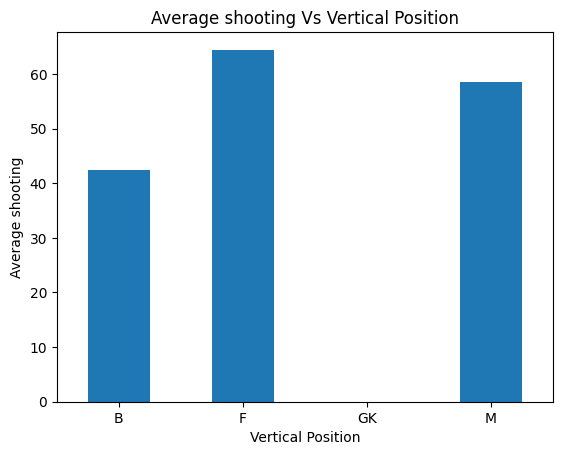

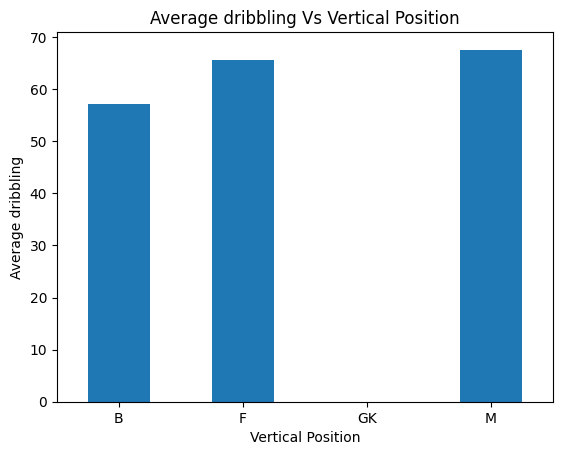

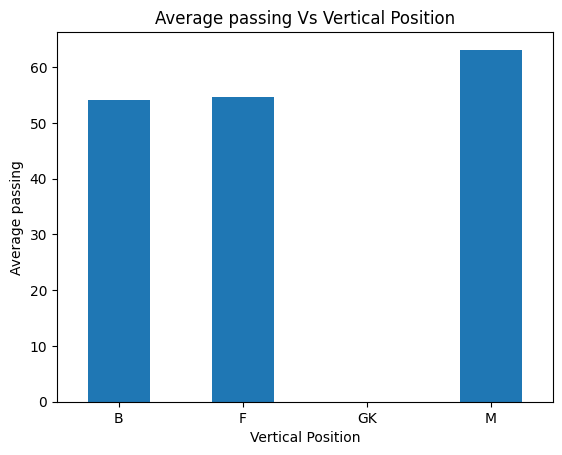

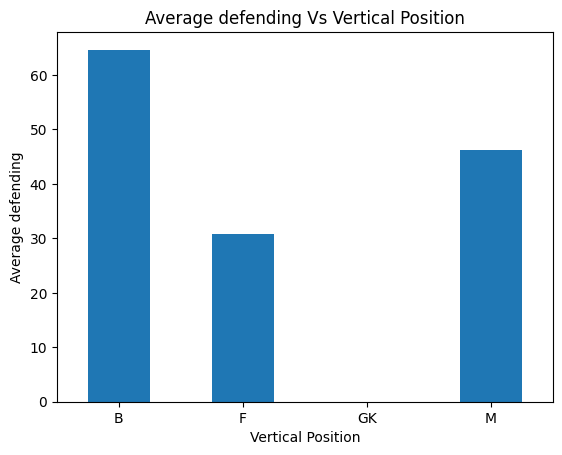

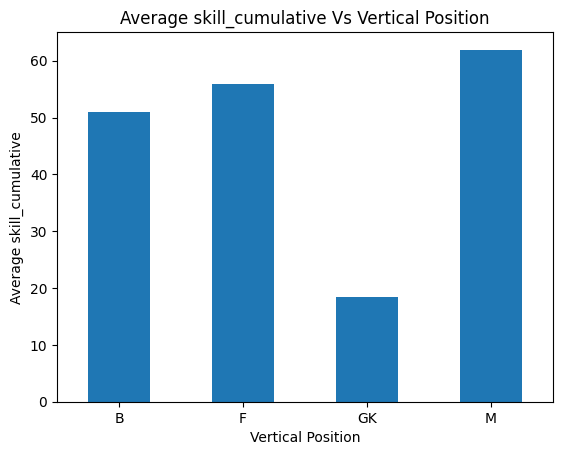

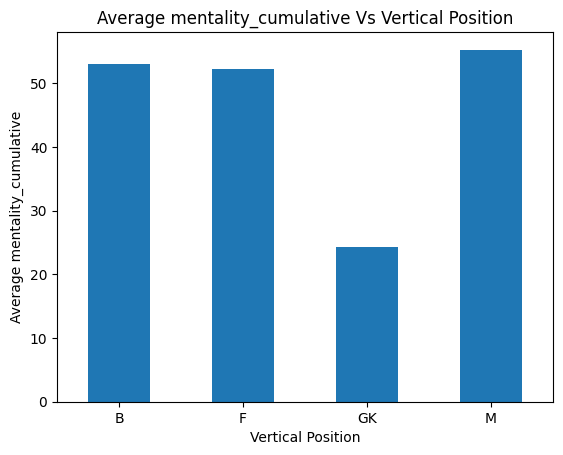

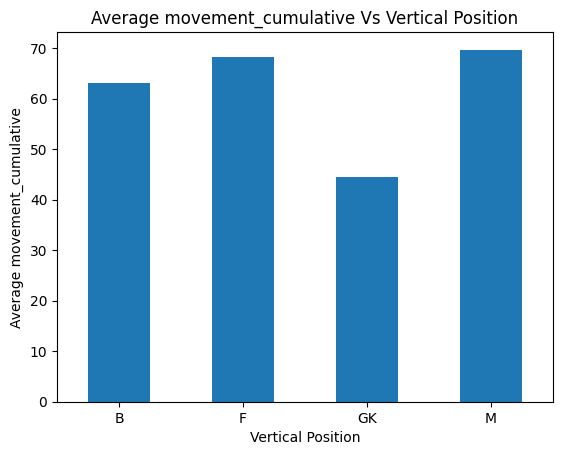

In [17]:
# Function to generate average values of specified skills against different vertical positions for players

def plot_vertical(df):
  ListofPlotsVsVerticalClasses = ['shooting','dribbling','passing','defending','skill_cumulative','mentality_cumulative','movement_cumulative' ]
  for x in ListofPlotsVsVerticalClasses:
    temp_df=df.groupby(['vertical_position'])[x].mean()
    ax = temp_df.plot.bar(rot=0)
    ax.set_xlabel("Vertical Position")
    ax.set_ylabel(f"Average {x}")
    plt.title(f"Average {x} Vs Vertical Position")
    plt.show()

plot_vertical(df)

## 6. Higher dimension Visualisation using PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn

In [22]:
# Pair Plot

def plotPairwise(df):
  df2 = df.drop(labels=['horizontal_position', 'vertical_position'], axis=1)
  sns.pairplot(
      data=df2, 
      hue="player_positions",
  )

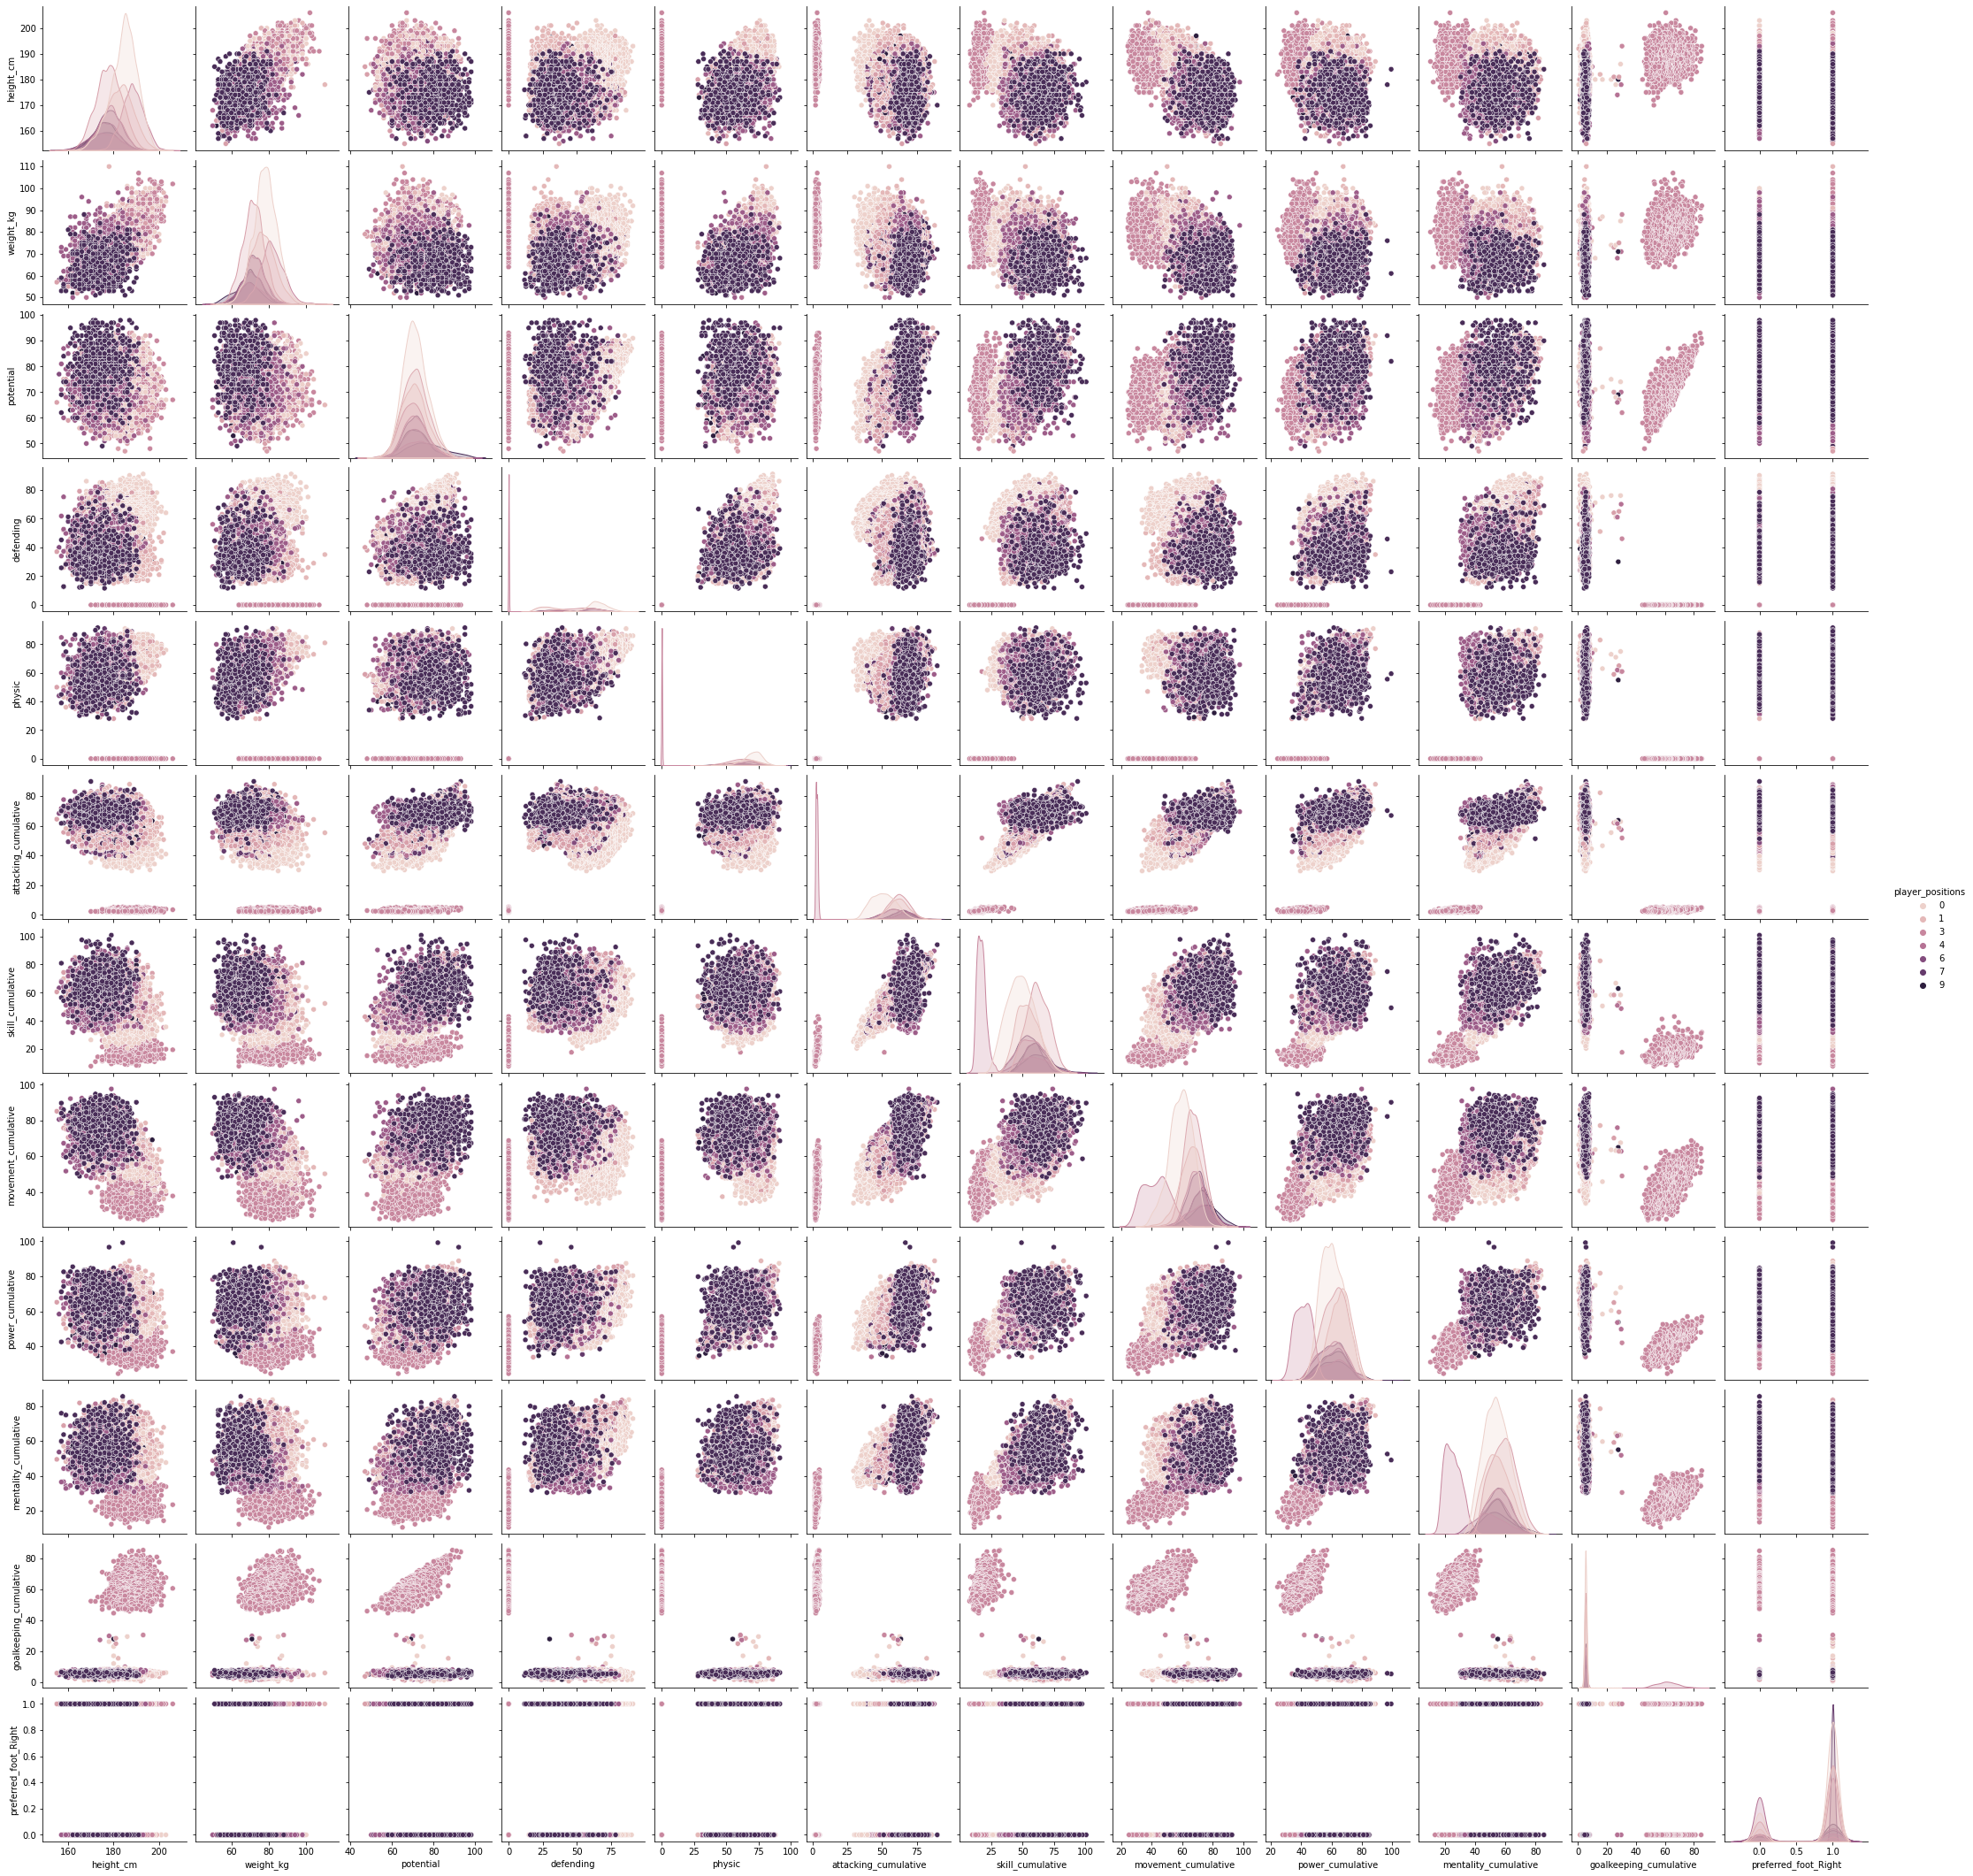

In [63]:
# print(df[df.index.duplicated()])
plotPairwise(df)


### PCA

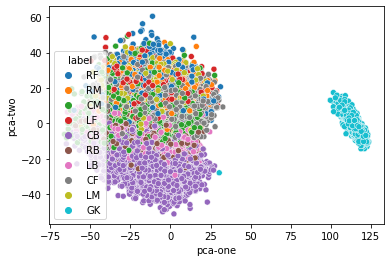

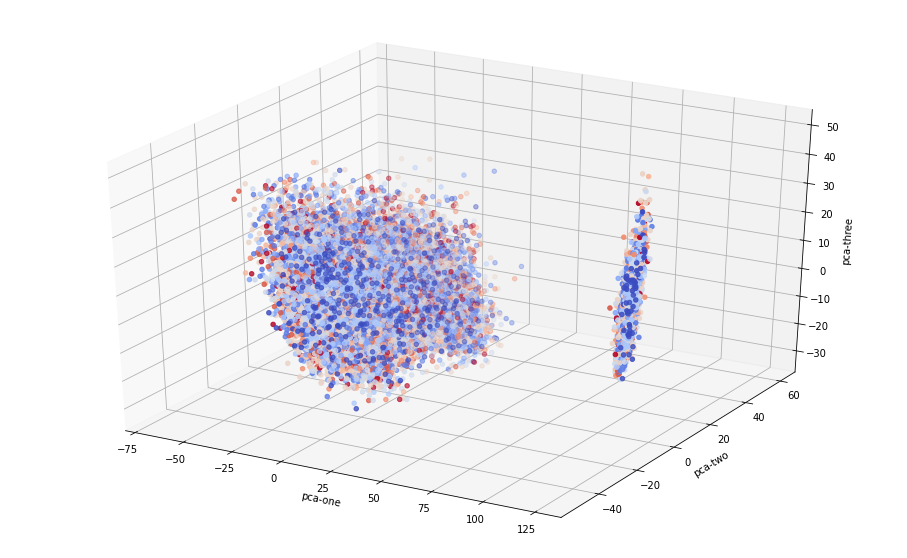

In [25]:
def performPCA(df):
    # Dropping non-numeric columns
    df2 = df.drop(labels=['horizontal_position', 'vertical_position', 'player_positions', 'preferred_foot'], axis=1)
    
    # Initialization
    pca = PCA(n_components=3)
    
    # Fit and Transform
    pca_result = pca.fit_transform(np.array(df2))
    
    # Adding player positions as a new column
    df2['label'] = df['player_positions'].squeeze()
    

    df2['pca-one'] = pca_result[:, 0]
    df2['pca-two'] = pca_result[:, 1]
    df2['pca-three'] = pca_result[:, 2]
    
    np.random.seed(0)
    
    indices = np.random.permutation(df2.shape[0])[:]
    
    # Create a scatter plot
    seaborn.scatterplot(data=df2.loc[indices], x='pca-one', y='pca-two', hue='label')
    plt.show()
    
    ax = plt.figure(figsize=(16, 10)).gca(projection='3d')
    
    ax.scatter(
        xs=df2.loc[indices]['pca-one'], 
        ys=df2.loc[indices]['pca-two'], 
        zs=df2.loc[indices]['pca-three'], 
        c=pd.factorize(df.player_positions)[0], 
        cmap='coolwarm',
    )
    
    # Label the axes
    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    
    plt.show()

performPCA(df)


## 7. Evaluation of Different Models


### Imports for Models

In [45]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, confusion_matrix, multilabel_confusion_matrix, f1_score, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import graphviz
import cv2
from IPython.display import display
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [27]:
sklearn.__version__

'1.0.1'

In [28]:
df = pd.get_dummies(data = df, columns = ['preferred_foot'], drop_first = True)

In [29]:
df.head()

height_cm  weight_kg  ...  goalkeeping_cumulative preferred_foot_Right
0        170         72  ...                    5.40                    0
1        187         83  ...                    5.80                    1
2        188         87  ...                   84.45                    1
3        184         80  ...                    5.10                    1
4        175         68  ...                    5.90                    1

[5 rows x 15 columns]

In [30]:
# function to split into training, test and validation set
def get_train_val_test_split(df, train_ratio, val_ratio, test_ratio):
    input_features, output_classes = [], []
    
    for column in df:
        if ('vertical_position') != column and ('horizontal_position' != column) and ('player_positions' != column):
            input_features.append(column) 

    # get X and Y
    X = df[input_features]
    Y = df[['vertical_position', 'horizontal_position', 'player_positions']]
    
    X = preprocessing.StandardScaler().fit(X).transform(X)    
    
    # splitting the dataset
    X_train, X_remaining, Y_train, Y_remaining = train_test_split(X, Y, test_size=val_ratio + test_ratio, random_state=42)
    
    # splitting the remaining data into validation and test sets
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_remaining, Y_remaining, test_size=test_ratio, random_state=42)
    
    return X, Y, X_train, Y_train, X_valid, Y_valid, X_test, Y_test, df, input_features, output_classes


### Naive Bayes

In [31]:
class NaiveBayes:    

    # single output classifier 
    def gnb_single(self, X_train, Y_train, X_valid, Y_valid):
        # Selecting
        Y_train = Y_train[['player_positions']]
        Y_valid = Y_valid[['player_positions']]
        
        # Gaussian Naive Bayes classifier 
        gaussian = GaussianNB(var_smoothing=1e-9) 
        gaussian.fit(X_train, Y_train) 

        pred = gaussian.predict(X_valid)
        
        print('Evaluation of NB - single: ')
        self.evaluate(Y_valid, pred)

    # multiple output classifier
    def gnb_multi(self, X_train, Y_train, X_valid, Y_valid):
        # initialization
        gaussian = MultiOutputClassifier(GaussianNB(var_smoothing=1e-9))

        Y_train = Y_train.drop(labels=['player_positions'], axis=1)    

        # fit
        gaussian.fit(X_train, Y_train)
        
        # predictions 
        predictions = gaussian.predict(X_valid)

        # Combine predictions into a single output
        combined_predictions = []
        for i in range(len(predictions)):
            # Combine the predictions from the multi-output classifier
            cp = predictions[i][1] + predictions[i][0]
            if cp == 'GKGK':
                cp = 'GK'
            combined_predictions.append(cp)      

        print('Evaluation of NB - dual')
        self.evaluate(Y_valid['player_positions'], combined_predictions)  

    # evaluation function
    def evaluate(self, Y_valid, pred):
        
        # Calculate the multilabel confusion matrix
        confusionMatrix = multilabel_confusion_matrix(Y_valid, pred)
        print(confusionMatrix)
        
        accuracy = accuracy_score(Y_valid, pred)
        print("The accuracy is ", accuracy)
        
        precision = precision_score(Y_valid, pred, average='weighted')
        print("The precision is ", precision)

        recall = recall_score(Y_valid, pred, average='weighted')
        print("The recall is ", recall)

        f1score = f1_score(Y_valid, pred, average='weighted')
        print("The f1score is ", f1score)



### Random Forest

In [34]:
class Random_Forest:
    
    # single output classifier
    def train_model_single(self, X_train, Y_train, X_valid, Y_valid):
      
        Y_train = Y_train[['player_positions']]
        Y_valid = Y_valid[['player_positions']]
        
        # initializing random forest classifier
        multiclass_rf_sk = RandomForestClassifier(criterion='gini', max_depth=19, max_features='sqrt', n_jobs=-1)
        
        print(Y_train.head())

        multiclass_rf_sk.fit(X_train, Y_train)

        predictions = multiclass_rf_sk.predict(X_valid)

        print('Evaluation of Random Forest - single')
        self.evaluate(Y_valid, predictions)

    # multiple output classifier
    def train_model_multi(self, X_train, Y_train, X_valid, Y_valid):
        # initialisation
        multiclass_rf_sk = MultiOutputClassifier(RandomForestClassifier(criterion='gini', max_depth=19, max_features='sqrt', n_jobs=-1))

        Y_train = Y_train.drop(labels=['player_positions'], axis=1)    

        multiclass_rf_sk.fit(X_train, Y_train)

        predictions = multiclass_rf_sk.predict(X_valid)
        
        # Combine predictions into a single output
        combined_predictions = []
        for i in range(len(predictions)):
            # Combine the predictions from the multi-output classifier
            cp = predictions[i][1] + predictions[i][0]
      
            if cp == 'GKGK':
                cp = 'GK'
            combined_predictions.append(cp)      

        print('Evaluation of multiclass Random Forest - dual')
        self.evaluate(Y_valid['player_positions'], combined_predictions)  

    def evaluate(self, labels, predictions):
        # Define the possible player positions
        positions = [
            'GK',
            'LB',
            'CB',
            'RB',
            'LM',
            'CM',
            'RM',
            'LF',
            'CF',
            'RF'             
        ]
        positions = sorted(positions)
  
        # Calculate evaluation metrics
        accuracy = accuracy_score(labels, predictions)
        precision = precision_score(labels, predictions, average='weighted')
        recall = recall_score(labels, predictions, average='weighted') 
        f1score = f1_score(labels, predictions, average='weighted')

        # Create and display the confusion matrix
        cm = confusion_matrix(labels, predictions)
        cm_df = pd.DataFrame(
            cm,
            index=positions, 
            columns=positions
        )
        
        # Plotting the confusion matrix using a heatmap
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        plt.show()

        # Print evaluation metrics
        print('Accuracy : {}'.format(accuracy))
        print('Precision : {}'.format(precision))
        print('Recall : {}'.format(recall))
        print('F1 Score : {}'.format(f1score))


    def gridSearch(self, X_train, Y_train):
       
        Y_train = Y_train[['player_positions']]
        
        # Define the grid of hyperparameters for grid search
        grid = {
            "max_depth": range(1, 20), 
            "max_features": ['sqrt', 'log2'], 
            "criterion": ['gini', 'entropy']
        }
        
        # Initialize Random Forest classifier
        multiclass_rf_sk = RandomForestClassifier(n_jobs=-1)
        
        # Perform grid search with cross-validation
        multiclass_rf_sk = RandomForestClassifier(n_jobs=-1)
        multiclass_cv = GridSearchCV(multiclass_rf_sk, grid, cv = 2)
        multiclass_cv.fit(X_train, Y_train.values.ravel())
        print(multiclass_cv.best_params_)
        print(multiclass_cv.best_score_)


### Decision Tree

In [35]:
class DecisionTree:
  def __init__(self, X_train, y_train, X_test, y_test, feature_names, pos_label, criterion='gini', max_depth=10, find_best_depth=True):
      # Training data
      self.X_train = X_train
      self.y_train = y_train

      # Test data
      self.X_test = X_test
      self.y_test = y_test

      # For storing predictions
      self.y_pred = np.zeros(y_test.shape)

      # Instantiate sklearn decision tree
      self.criterion = criterion
      self.max_depth = max_depth
      self.feature_names = feature_names
      self.pos_label = pos_label
      self.best_max_depth = None

      if find_best_depth == False:
          self.dtree = DecisionTreeClassifier(criterion=self.criterion, random_state=7, max_depth=self.max_depth)
      else:
          # Find best model parameters
          self.dtree = self.find_best_parameter()


  def find_best_parameter(self):
      # Using sklearn grid search to estimate model parameters
      max_depth_list = np.arange(1,21)
      param_list = {'max_depth':max_depth_list}

      dtree_search = GridSearchCV(DecisionTreeClassifier(criterion=self.criterion, random_state=7), param_list, scoring='accuracy')
      dtree_search.fit(self.X_train, self.y_train)

      a, b, c = dtree_search.best_estimator_ , dtree_search.best_params_ , dtree_search.cv_results_
      self.best_max_depth = b['max_depth']
      print(f"Best value of max_depth = {self.best_max_depth}\n")
      self.plot_max_depth(max_depth_list, c['mean_test_score'])

      return a

  def plot_max_depth(self, x_plot, y_plot):
      plt.figure(figsize=(10,6))
      plt.plot(x_plot, y_plot*100, 'o--r', mfc='b', mec='b')
      plt.axvline(x=self.best_max_depth, color='g', linestyle='--')
      plt.xlabel('Tree max_depth parameter')
      plt.ylabel('accuracy (%)')
      plt.title('Plot of max_depth VS accuracy')
      plt.show()


  def train_model(self):
      # model.fit 
      self.dtree.fit(self.X_train, self.y_train)

  def predict(self):
      # model.predict
      self.y_pred = self.dtree.predict(self.X_test)

  def evaluate(self):
      # Give different accuracy measures
      print("DECISION TREE MODEL PERFORMANCE\n")

      dtree_accuracy = metrics.accuracy_score(self.y_test, self.y_pred)
      print(f'Accuracy = {dtree_accuracy:.3f}')

      dtree_precision = metrics.precision_score(self.y_test, self.y_pred, average = 'weighted')
      print(f'Precision = {dtree_precision:.3f}')

      dtree_recall = metrics.recall_score(self.y_test, self.y_pred, average = 'weighted')
      print(f'Recall = {dtree_recall:.3f}')

      # Classification report
      print("\nCLASSIFICATION REPORT\n")
      print(classification_report(self.y_test, self.y_pred, target_names=self.pos_label))

  def confusion_matrix(self):
      # plot confusion matrix
      plt.figure(figsize=(10,6))
      cf = confusion_matrix(self.y_test, self.y_pred)
      cf_plot = sns.heatmap(cf, annot=True, cmap='GnBu', xticklabels=self.pos_label, yticklabels=self.pos_label)
      plt.title("CONFUSION MATRIX")
      plt.xlabel('PREDICTED Labels')
      plt.ylabel('TRUE Labels')
      plt.show()

  def visualise(self):
      # Plot dtree
      dot_data = tree.export_graphviz(self.dtree, out_file='dtree_graphviz.dot', 
                    feature_names=self.feature_names,  
                    class_names=self.pos_label,  
                    filled=True, rounded=True,  
                    special_characters=True)  
      graph = graphviz.Source(dot_data)

### Multiclass Logistic Regression

In [36]:
class multiclass_logistic_regression:

  # single output classifier
  def train_model_single(self, X_train, Y_train, X_valid, Y_valid):
    Y_train = Y_train[['player_positions']]
    Y_valid = Y_valid[['player_positions']] 

    # Initialization
    multiclass_lr_sk = LogisticRegression(
      multi_class='multinomial', C=3.162, penalty='l2', solver='newton-cg',
      tol=1e-5, random_state=42, max_iter=10000
    )

    # Fit
    multiclass_lr_sk.fit(X_train, Y_train)
    predictions = multiclass_lr_sk.predict(X_valid)
    
    print('Evaluation of multiclass LR - single')
    self.evaluate(Y_valid, predictions)

  # Multiple Output Classifier
  def train_model_multi(self, X_train, Y_train, X_valid, Y_valid):
    # Initialization
    multiclass_lr_sk = MultiOutputClassifier(
      LogisticRegression(multi_class='multinomial', C=3.162, penalty='l2',
                         solver='newton-cg', tol=1e-5, random_state=42, max_iter=10000)
    )

    Y_train = Y_train.drop(labels=['player_positions'], axis=1)  

    multiclass_lr_sk.fit(X_train, Y_train)
    predictions = multiclass_lr_sk.predict(X_valid)

    combined_predictions = [] 

    # Combine predictions and adjust for 'GK' cases
    for i in range(len(predictions)):
      cp = predictions[i][1] + predictions[i][0]
      if cp == 'GKGK':
        cp = 'GK'
      combined_predictions.append(cp)      

    print('Evaluation of multiclass LR - dual models \n')
    self.evaluate(Y_valid['player_positions'], combined_predictions) 

  # evaluations
  def evaluate(self, labels, predictions):
    positions = sorted([
      'GK', 'LB', 'CB', 'RB', 'LM', 'CM', 'RM', 'LF', 'CF', 'RF'  # Player positions
    ])

    # Calculate various evaluation metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted') 
    f1score = f1_score(labels, predictions, average='weighted')

    # Uncomment the block below if you want to plot the confusion matrix
    # cm = confusion_matrix(labels, predictions)
    # cm_df = pd.DataFrame(cm, index=positions, columns=positions)
    # sns.heatmap(cm_df, annot=True)
    # plt.title('Confusion Matrix')
    # plt.ylabel('Actual Values')
    # plt.xlabel('Predicted Values')
    # plt.show()

    # Print evaluation metrics
    print('Accuracy : {}'.format(accuracy))
    print('Precision : {}'.format(precision))
    print('Recall : {}'.format(recall))
    print('F1 Score : {}'.format(f1score))


  # Perform hyperparameter tuning using GridSearchCV
  def gridSearch(self, X_train, Y_train):
    Y_train = Y_train[['player_positions']]

    # Define a grid of hyperparameters for tuning
    grid = {
      "C": np.logspace(-1, 1, 5),  # Regularization strength
      'penalty': ['none', 'l2'],   # Penalty types
      'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']  # optimization algorithms
    }

    # Initialization
    multiclass_lr_sk = LogisticRegression(
      multi_class='multinomial', tol=1e-5, random_state=42, max_iter=10000
    )

    # Perform grid search to find the best parameters
    multiclass_cv = GridSearchCV(multiclass_lr_sk, grid, cv=2)
    multiclass_cv.fit(X_train, Y_train.values.ravel())

    print('Best score obtained : {}'.format(multiclass_cv.best_score_))
    print('Best parameters obtained : {}'.format(multiclass_cv.best_params_))


### MLP Classifier

In [56]:
class MLP_model:
  
  # single output classifier
  def train_model_single(self, X_train, Y_train, X_valid, Y_valid):
  
    Y_train = Y_train[['player_positions']]
    Y_valid = Y_valid[['player_positions']]
    
    # Initialization
    multiclass_rf_sk = MLPClassifier(hidden_layer_sizes=[10,5], learning_rate_init=0.001, activation='relu', learning_rate='invscaling')
    
    # Fit
    multiclass_rf_sk.fit(X_train, Y_train)
    
    # Predict
    predictions = multiclass_rf_sk.predict(X_valid)
    
    # Evaluate
    print('Evaluation of MLP - single')
    self.evaluate(Y_valid, predictions)

  # evaluation function
  def evaluate(self, labels, predictions):
    # Define player positions for evaluation
    positions = ['GK', 'LB', 'CB', 'RB', 'LM', 'CM', 'RM', 'LF', 'CF', 'RF']
    positions = sorted(positions)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average = 'weighted')
    recall = recall_score(labels, predictions, average = 'weighted')
    f1score = f1_score(labels, predictions, average='weighted')
    
    # Generate confusion matrix for visual analysis
    cm = confusion_matrix(labels, predictions)
    cm_df = pd.DataFrame(cm, index=positions, columns=positions)
    
    # Plot the confusion matrix
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    # Print evaluation metrics
    print('Accuracy : {}'.format(accuracy))
    print('Precision : {}'.format(precision))
    print('Recall : {}'.format(recall))
    print('F1 Score : {}'.format(f1score))


  # Function to perform grid search for hyperparameter tuning
  def gridSearch(self, X_train, Y_train):
    
    Y_train = Y_train[['player_positions']]
    
    # Define hyperparameter grid for tuning
    grid = { "learning_rate":['constant', 'invscaling', 'adaptive'],
             "activation":['identity', 'logistic', 'tanh', 'relu'],
             "learning_rate_init":[0.001, 0.05, 0.1, 1] }
    
    # Initialize MLP classifier
    multiclass_rf_sk = MLPClassifier(hidden_layer_sizes=[10,5])
    
    # Perform grid search with 2-fold cross-validation
    multiclass_cv = GridSearchCV(multiclass_rf_sk, grid, cv=2)
    multiclass_cv.fit(X_train, Y_train.values.ravel())
    
    # Print best parameters and score obtained
    print(multiclass_cv.best_params_)
    print(multiclass_cv.best_score_)


### Boosting Algorithms

In [39]:
def boosting(X_train, y_train, X_test, y_test):
    # Import necessary libraries for boosting algorithms
    from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report, accuracy_score
    from xgboost import XGBClassifier

    # ------------------------ AdaBoost Classifier ------------------------ #
    print('ADABoost Classifier')

    n_estimators = np.arange(10, 150, 10) 
    adaboost_test_acc = []

    # Intialization 
    dtree_base = DecisionTreeClassifier(criterion='gini', max_depth=10) 

    for i in n_estimators:
        # training the model
        model = AdaBoostClassifier(base_estimator=dtree_base, n_estimators=i)
        model.fit(X_train, y_train) 

        # predict
        y_pred = model.predict(X_test)
        adaboost_test_acc.append(accuracy_score(y_test, y_pred))  # Store accuracy

    print("Test Accuracy:", np.array(adaboost_test_acc))

    # Identifying the best model with the highest accuracy
    max_acc = max(adaboost_test_acc)
    best_est = n_estimators[np.argmax(adaboost_test_acc)]
    best_ada_model = AdaBoostClassifier(base_estimator=dtree_base, n_estimators=best_est)
    best_ada_model.fit(X_train, y_train)
    y_pred = best_ada_model.predict(X_test)

    print(f"\nMax Accuracy = {max_acc:.4f} with n_estimators = {best_est}")

    print("\nCLASSIFICATION REPORT\n")
    print(classification_report(y_test, y_pred, target_names=pos_label))

    # ------------------------ GradientBoost Classifier ------------------------ #
    
    print('\nGradientBoost Classifier')

    est = np.arange(10, 150, 10) 
    acc = []

    for i in est:
        print("est =", i)
        # training the model
        gb_model = GradientBoostingClassifier(n_estimators=i)
        gb_model.fit(X_train, y_train)  # Train the model

        # predict
        y_pred = gb_model.predict(X_test)
        acc.append(gb_model.score(X_test, y_test))  # Store accuracy

    print("Test Accuracy:", np.array(acc))

    # Identifying the best model with the highest accuracy
    max_acc = max(acc)
    best_est = est[np.argmax(acc)]
    print(f"\nMax Accuracy = {max_acc:.4f} with n_estimators = {best_est}")

    gb_model = GradientBoostingClassifier(n_estimators=best_est)
    print("Best GB model:\n", gb_model)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)

    print("\nCLASSIFICATION REPORT\n")
    print(classification_report(y_test, y_pred, target_names=pos_label))

    # ------------------------ XGBoost Classifier ------------------------ #

    print('\nXGBoost Classifier')

    est = np.arange(60, 200, 10)
    acc = []

    for i in est:
        print("est =", i)
        # training the model
        xgb_model = XGBClassifier(
            n_estimators=i, max_depth=10, subsample=0.8, 
            learning_rate=0.1, verbosity=1
        )
        xgb_model.fit(X_train, y_train)

        # predict
        y_pred = xgb_model.predict(X_test)
        acc.append(xgb_model.score(X_test, y_test))

    print("Test Accuracy:", np.array(acc))

    # Identifingy the best model with the highest accuracy
    max_acc = max(acc)
    best_est = est[np.argmax(acc)]
    print(f"\nMax Accuracy = {max_acc:.4f} with n_estimators = {best_est}")

    # Train the best XGBoost model
    xgb_model = XGBClassifier(
        n_estimators=best_est, max_depth=10, subsample=0.8, verbosity=1
    )
    print("Best XGB model:\n", xgb_model)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    print("\nCLASSIFICATION REPORT\n")
    print(classification_report(y_test, y_pred, target_names=pos_label))


### Running all Models

In [42]:
X, Y, X_train, Y_train, X_valid, Y_valid, X_test, Y_test, df, input_features, output_classes = get_train_val_test_split(df, 0.7, 0.245, 0.005)

print('Multiclass Logistic Regression')
multiclass_lr = multiclass_logistic_regression()
multiclass_lr.gridSearch(X_train, Y_train)
multiclass_lr.train_model_single(X_train, Y_train, X_valid, Y_valid)
multiclass_lr.train_model_multi(X_train, Y_train, X_valid, Y_valid)
multiclass_lr.Kfold(X, Y)
print()

Multiclass Logistic Regression
Best score obtained : 0.7011750405186385
Best parameters obtained : {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
Evaluation of multiclass LR - single
Accuracy : 0.716758297699043
Precision : 0.6925617644618303
Recall : 0.716758297699043
F1 Score : 0.6961185296368396
Evaluation of multiclass LR - dual models 

Accuracy : 0.6518020769700672
Precision : 0.6397894965705451
Recall : 0.6518020769700672
F1 Score : 0.630489397341783
K-Fold CV results - Multiclass - LR
0.7057330508050594



Random Forests
      player_positions
13729               CF
610                 CM
12836               RM
9389                GK
10612               CF


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Evaluation of Random Forest - single


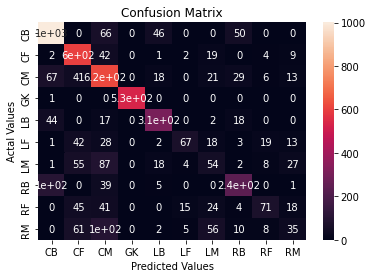

Accuracy : 0.7179800447973936
Precision : 0.7008509171717912
Recall : 0.7179800447973936
F1 Score : 0.699428656203402
Evaluation of multiclass Random Forest - dual


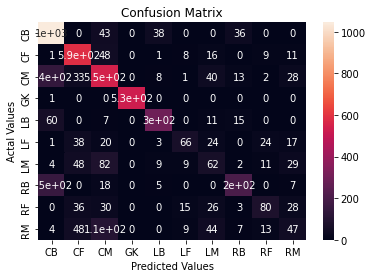

Accuracy : 0.705966198330279
Precision : 0.690136020865136
Recall : 0.705966198330279
F1 Score : 0.6906119527628171
K-Fold CV results - Multiclass - RF
{'fit_time': array([4.53939605, 4.53029418, 4.42186666, 4.52449346, 2.30065536]), 'score_time': array([0.21950722, 0.2081027 , 0.2294445 , 0.21441817, 0.10671759]), 'test_score': array([0.71461129, 0.72195493, 0.70422892, 0.72018232, 0.71175279]), 'train_score': array([0.99860715, 0.99873378, 0.99803735, 0.99860715, 0.99841732])}



In [50]:
print('Random Forests')
multiclass_rf = Random_Forest()
multiclass_rf.train_model_single(X_train, Y_train, X_valid, Y_valid)
multiclass_rf.train_model_multi(X_train, Y_train, X_valid, Y_valid)
multiclass_rf.Kfold(X, Y)
print()

MultiLayered Perceptron
{'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.001}
0.7031334413830361
      player_positions
13729               CF
610                 CM
12836               RM
9389                GK
10612               CF
Evaluation of MLP - single


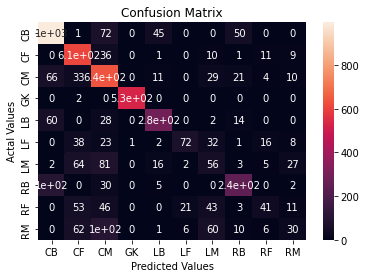

Accuracy : 0.7143148035023417
Precision : 0.6957546117523007
Recall : 0.7143148035023417
F1 Score : 0.6932144539742875
K-Fold CV results - Multiclass - MLP
{'fit_time': array([18.09472394, 18.1359539 , 18.12268615, 18.08874178, 10.7164669 ]), 'score_time': array([0.00969028, 0.01347327, 0.00950623, 0.00880075, 0.00596929]), 'test_score': array([0.71511775, 0.72119524, 0.70701443, 0.70904026, 0.70390071]), 'train_score': array([0.71763216, 0.72212726, 0.72117759, 0.7172523 , 0.71454799])}


In [57]:
print('MultiLayered Perceptron')
multiclass_mlp = MLP_model()
multiclass_mlp.gridSearch(X_train, Y_train)
multiclass_mlp.train_model_single(X_train, Y_train, X_valid, Y_valid)
multiclass_mlp.Kfold(X, Y)

In [58]:
print('Naive Bayes')
multiclass_nb = NaiveBayes()
multiclass_nb.gnb_single(X_train, Y_train, X_valid, Y_valid)
multiclass_nb.gnb_multi(X_train, Y_train, X_valid, Y_valid)
multiclass_nb.Kfold(X, Y)
print()

Naive Bayes
Evaluation of NB - single: 
The accuracy is  0.6279780085522297
The precision is  0.6501051840475816
The recall is  0.6279780085522297
The f1score is  0.6256352542097441
Evaluation of NB - dual
The accuracy is  0.5389940948890246
The precision is  0.621553314382498
The recall is  0.5389940948890246
The f1score is  0.5262681670834843
K-Fold CV results - Naive Bayes
Average Test set accuracy : 0.6172504523864685



There are 10 unique player positions:

Position encoding: [0 1 2 3 4 5 6 7 8 9]
Position labels: ['CB', 'CF', 'CM', 'GK', 'LB', 'LF', 'LM', 'RB', 'RF', 'RM']
Best value of max_depth = 9



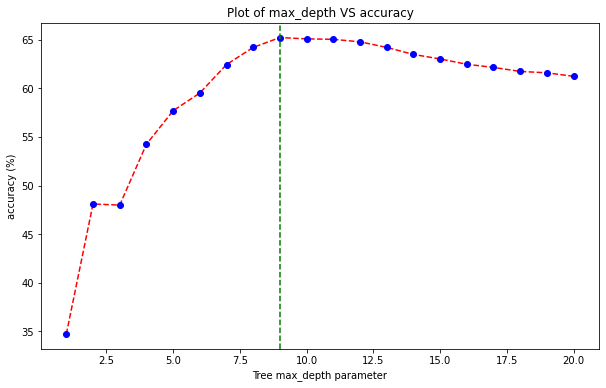

DecisionTreeClassifier(max_depth=9, random_state=7)
DECISION TREE MODEL PERFORMANCE

Accuracy = 0.650
Precision = 0.617
Recall = 0.650

CLASSIFICATION REPORT

              precision    recall  f1-score   support

          CB       0.74      0.86      0.79      1163
          CF       0.64      0.82      0.72       680
          CM       0.46      0.67      0.55       814
          GK       1.00      1.00      1.00       534
          LB       0.70      0.74      0.72       389
          LF       0.61      0.23      0.34       193
          LM       0.16      0.05      0.07       256
          RB       0.59      0.43      0.50       386
          RF       0.47      0.20      0.28       218
          RM       0.27      0.03      0.06       278

    accuracy                           0.65      4911
   macro avg       0.56      0.50      0.50      4911
weighted avg       0.62      0.65      0.61      4911



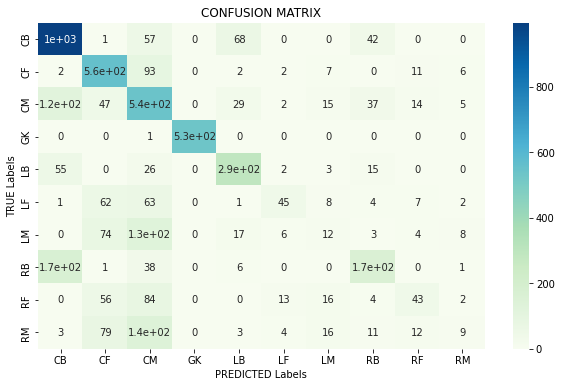

DECISION TREE
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0148723 to fit


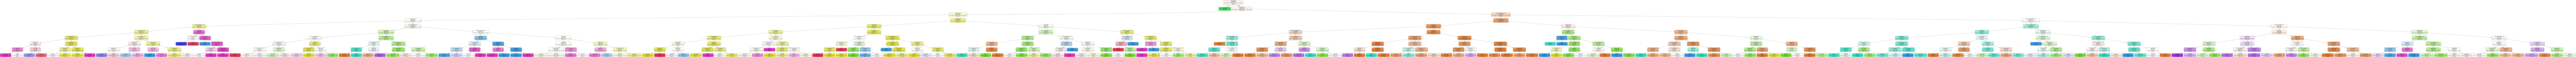

ADABoost Classifier
Test Accuracy: [0.60252494 0.64447159 0.65607819 0.67827326 0.67399715 0.682753
 0.68295663 0.686011   0.69945021 0.68947261 0.69110161 0.69191611
 0.70067196 0.69782122]

Max Accuracy = 0.7007 with n_estimators = 130

CLASSIFICATION REPORT

              precision    recall  f1-score   support

          CB       0.82      0.82      0.82      1163
          CF       0.75      0.84      0.79       680
          CM       0.55      0.79      0.65       814
          GK       1.00      1.00      1.00       534
          LB       0.80      0.70      0.75       389
          LF       0.67      0.34      0.45       193
          LM       0.24      0.19      0.21       256
          RB       0.67      0.59      0.63       386
          RF       0.64      0.26      0.37       218
          RM       0.23      0.16      0.19       278

    accuracy                           0.70      4911
   macro avg       0.64      0.57      0.59      4911
weighted avg       0.69      0.70 

In [62]:
le = preprocessing.LabelEncoder()
df['player_positions'] = le.fit_transform(df['player_positions'])
df_dt = df
df_dt = df.drop(labels = ['horizontal_position', 'vertical_position', 'player_positions'], axis = 1)
feature_names = list(df_dt.columns)
pos_num = np.unique(df['player_positions'])
print(f'There are {len(pos_num)} unique player positions:\n')

pos_label = ['CB', 'CF', 'CM', 'GK', 'LB', 'LF', 'LM', 'RB', 'RF', 'RM']
print(f'Position encoding: {pos_num}')
print(f'Position labels: {pos_label}')

Y_train = Y_train[['player_positions']]
Y_valid = Y_valid['player_positions']

dtree_model = DecisionTree(X_train, Y_train, X_valid, Y_valid, feature_names, pos_label, criterion='gini', find_best_depth=True)
print(dtree_model.dtree)

dtree_model.train_model()
dtree_model.predict()
dtree_model.evaluate()

dtree_model.confusion_matrix()

print("DECISION TREE")
dtree_model.visualise()     
!dot -Tpng dtree_graphviz.dot -Gdpi=3000 -o dtree_graphviz.png
display(Image.open('dtree_graphviz.png'))

boosting(X_train, Y_train, X_valid, Y_valid)